**Chapter 4 – Training Models**

_This notebook contains all the sample code and solutions to the exercises in chapter 4._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [79]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

## The Normal Equation

In [80]:
# Let’s generate some linear-looking data to test this equation on (Figure 4-1):
# The actual function that we used to generate the data is y = 4 + 3x{1} + Gaussian noise.

import numpy as np

X = 2 * np.random.rand(100, 1) # return random numbers, 100 number, 1 => one time.
y = 4 + 3 * X + np.random.randn(100, 1) # randon here to make line not streat line

Saving figure generated_data_plot


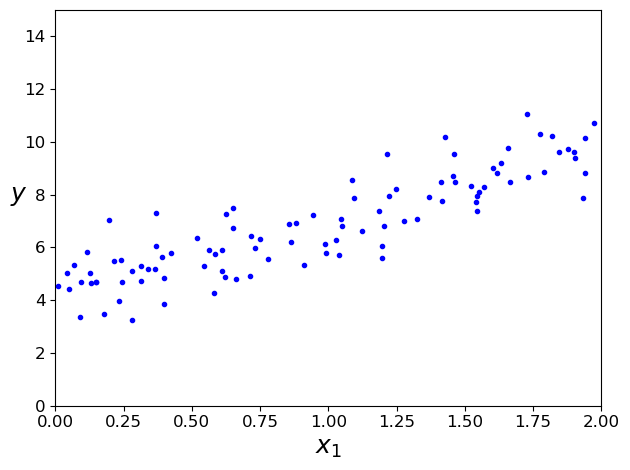

In [81]:
# draw  (Figure 4-1):
plt.plot(X, y, "b.") # draw x and y, b => color blue, "." => draw dot 
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [82]:
# Now let’s compute  using the Normal Equation. We will use the inv() function from 
# NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and 
# the dot() method for matrix multiplication:
    
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance, X=> x1,x2,x3,.. => our features

# comput Normal Equation.
# np.linalg.inv => learier algabra invers
# X_b.T.dot(X_b), X_b our features, T => transpose, dot => multiply 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [83]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise. 
# Let’s see what the equation found:

theta_best
# [4.21509616] => theta0,
#      [2.77011339] => theata1

array([[4.21509616],
       [2.77011339]])

In [84]:
X_b
# X0 always equal 1

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close 
enough, but the noise made it impossible to recover the exact parameters of the origi‐ 
nal function.

In [85]:
# Now you can make predictions using   theata:
X_new = np.array([[0], [2]]) # predect 0,2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
# the equation: x * theta = y predection
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

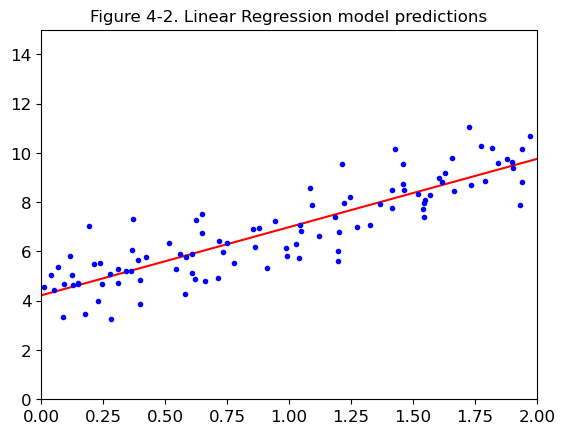

In [86]:
# Figure 4-2. Linear Regression model predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("Figure 4-2. Linear Regression model predictions")
plt.show()

The figure in the book actually corresponds to the following code, with a legend and axis labels:

Saving figure linear_model_predictions_plot


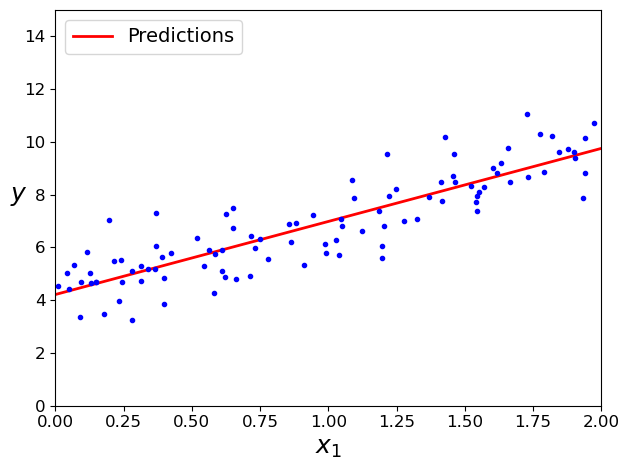

In [87]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

# Performing linear regression using Scikit-Learn is quite simple:$^3$

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # those are linear regression theata
# 3  Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).

(array([4.21509616]), array([[2.77011339]]))

In [89]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [94]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) # lstsq input X,Y output best theata like upper theata calculation.
theta_best_svd

# lstsq equation is sudo invers equation (np.linalg.pinv)
# 

array([[4.21509616],
       [2.77011339]])

In [95]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

np.linalg.pinv(X_b).dot(y)  $\mathbf{X}^+\mathbf{y}$

Both the Normal Equation and the SVD approach get very slow 
when the number of features grows large (e.g., 100,000). On the 
positive side, both are linear with regards to the number of instan‐ 
ces in the training set (they are O(m)), so they handle large training 
sets efficiently, provided they can fit in memory.

# Gradient Descent
## Batch Gradient Descent

In [96]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100 # we have 100 instance => 100 data points

theta = np.random.randn(2,1)  # random initialization, we have 1 feature, init vector 2 rows 1 column.

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [99]:
theta

array([[4.21509616],
       [2.77011339]])

In [100]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [101]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


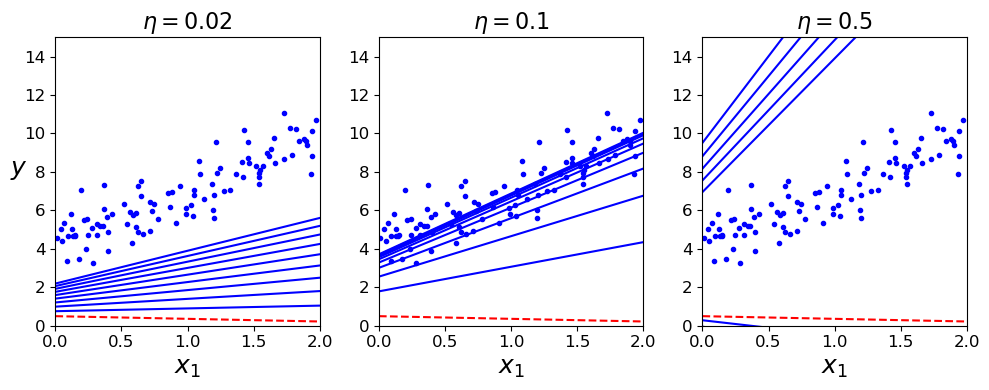

In [102]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [ ]:
Gradient Descent find a good learning rate, you can use grid search??

Yes, you can use a grid search to find a good learning rate for gradient descent. Here's how you can approach this:

Steps to Perform Grid Search for Learning Rate:
Define a Range of Learning Rates: Choose a range of possible learning rates, for example, 
[10$^{−5}$ ,10$^{−4}$, 10$^{−3}$ ,10$^{−2}$ ,10$^{−1}$].

Train Your Model for Each Learning Rate:

For each candidate learning rate, train the model on a fixed number of epochs or iterations.
Record the performance metric, such as training loss or validation loss.
Evaluate Performance:

Plot the learning curves for different learning rates.
Analyze the metrics to identify the learning rate that results in steady convergence without overshooting or stagnating.
Refine the Search (Optional): If you identify a promising range, you can refine your search by narrowing the range and testing more values (e.g., using smaller increments like 0.001,0.002,0.003).

## Example Implementation in Python
Here’s how you could implement it using a library like TensorFlow/Keras or PyTorch:


TensorFlow/Keras

In [ ]:
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example model
model = Sequential([Dense(10, activation='relu', input_shape=(20,)),
                    Dense(1, activation='sigmoid')])

# Data (replace with actual data)
X_train = np.random.rand(100, 20)
y_train = np.random.randint(0, 2, 100)

# Range of learning rates
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
results = {}

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    optimizer = SGD(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, verbose=0)
    results[lr] = history.history['loss'][-1]  # Save final training loss

# Analyze results
best_lr = min(results, key=results.get)
print(f"Best learning rate: {best_lr}")


PyTorch:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(20, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model = SimpleModel()

# Data (replace with actual data)
X_train = torch.rand(100, 20)
y_train = torch.randint(0, 2, (100, 1)).float()

# Range of learning rates
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
criterion = nn.BCELoss()
results = {}

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(10):  # Train for 10 epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    
    results[lr] = loss.item()  # Save final training loss

# Analyze results
best_lr = min(results, key=results.get)
print(f"Best learning rate: {best_lr}")


Notes:
**Visualizing Results:** Plotting learning rates vs. final loss values can provide insights into which range works best.

**Learning Rate Scheduling:** Once you identify a good learning rate, you might use a learning rate scheduler to adjust it dynamically during training.

**Consider Logarithmic Scale:** When testing a wide range, a logarithmic scale (e.g., $10^{−5}, 10^{−4.5}$, etc.) might be more efficient than linear increments.

### Grid Search

One way to do that would be to fiddle with the hyperparameters manually, until you 
find a great combination of hyperparameter values. This would be very tedious work, 
and you may not have time to explore many combinations.

Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to 
do is tell it which hyperparameters you want it to experiment with, and what values to 
try out, and it will evaluate all the possible combinations of hyperparameter values, 
using cross-validation. For example, the following code searches for the best combi‐ 
nation of hyperparameter values for the RandomForestRegressor:

In [24]:
from sklearn.model_selection import GridSearchCV 
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, 
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error', 
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

NameError: name 'RandomForestRegressor' is not defined

## Stochastic Gradient Descent

In [36]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

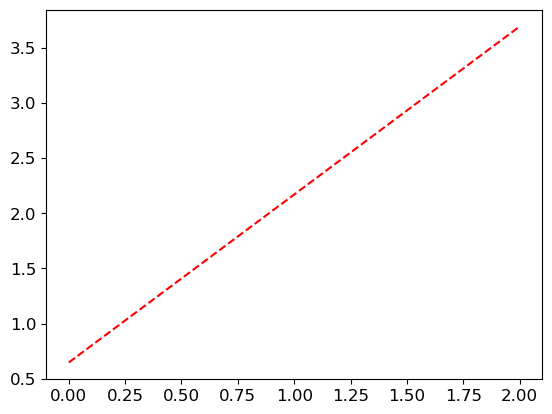

In [103]:
# This code implements Stochastic Gradient Descent using a simple learning schedule:
# will rech theta array([[4.21076011], [2.74856079]]) using 50 epoch only, instead of 1000 epoch above
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

# decrease learning rate each iteration
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs): # iteration epoch
    for i in range(m): # we get some instance each one epoch
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m) # get randame instance
        xi = X_b[random_index:random_index+1] # get randame instance
        yi = y[random_index:random_index+1] # get randame instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [27]:
theta

array([[4.21076011],
       [2.74856079]])

In [104]:
# gradient example: will use SGDRegressor
from sklearn.linear_model import SGDRegressor

# max_iter=1000 => 100 iteration, tol=1e-3 => stop when gradien less than tolerance 0.001, eta0=0.1 => learning rate
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [105]:
sgd_reg.intercept_, sgd_reg.coef_ # theta results

(array([4.24365286]), array([2.8250878]))

## Mini-batch gradient descent

In [38]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [39]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [40]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

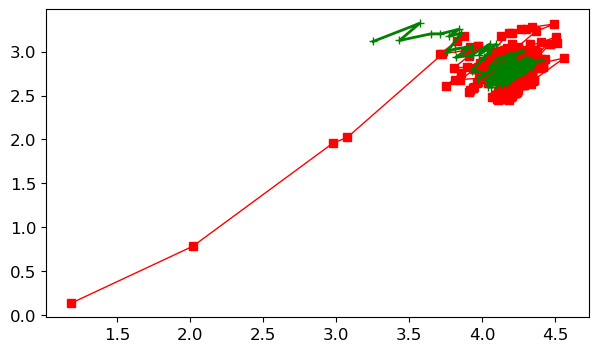

In [41]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# Polynomial Regression

In [106]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [107]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


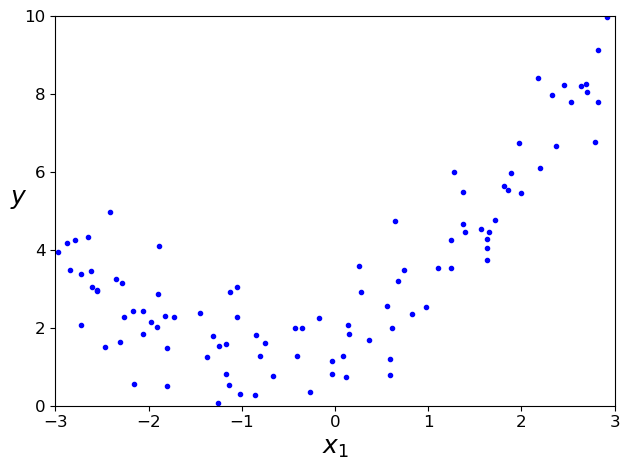

In [108]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [109]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [110]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# array([1.78134581]), => theta0
# array([[0.93366893, 0.56456263]])) => theta1, theta2

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False) # test degree = 3
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [115]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

In [116]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# array([1.78437842]), => theta0
# array([[ 1.02570217,  0.56304305, -0.01702965]])) => theta1, theta2, theta3

(array([1.78437842]), array([[ 1.02570217,  0.56304305, -0.01702965]]))

Saving figure quadratic_predictions_plot


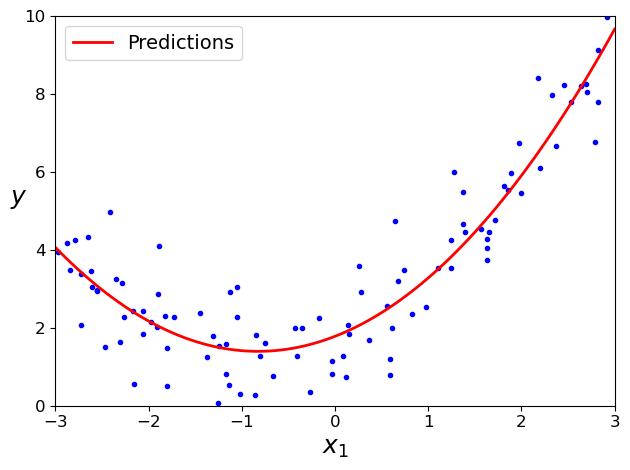

In [112]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


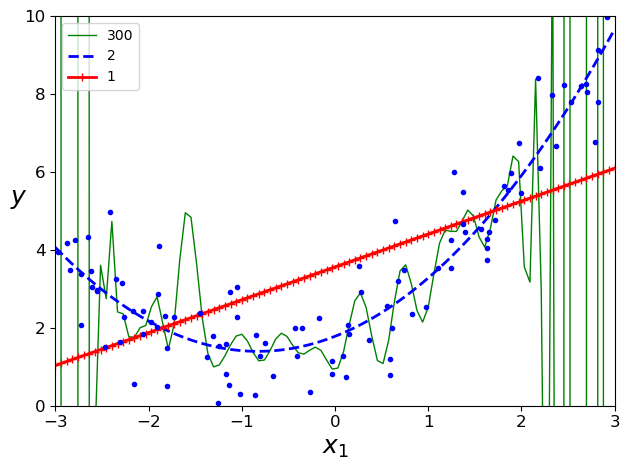

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization 
performance. If a model performs well on the training data but generalizes poorly 
according to the cross-validation metrics, then your model is overfitting. If it per‐ 
forms poorly on both, then it is underfitting. This is one way to tell when a model is 
too simple or too complex.

### Overfitting:
according to the cross-validation metrics. If a model performs well on the training data but generalizes poorly.

### Underfitting:
If it performs poorly on both

Another way is to look at the learning curves: these are plots of the model’s perfor‐ 
mance on the training set and the validation set as a function of the training set size 
(or the training iteration). To generate the plots, simply train the model several times 
on different sized subsets of the training set. The following code defines a function 
that plots the learning curves of a model given some training data:

If your model is underfitting the training data, adding more train‐ 
ing examples will not help. You need to use a more complex model 
or come up with better features.

One way to improve an overfitting model is to feed it more training 
data until the validation error reaches the training error.

In [ ]:
# solve regulization problem

# Learning Curves

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10) # split data
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m]) # increasing train size each time, to see what happend in graph.
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


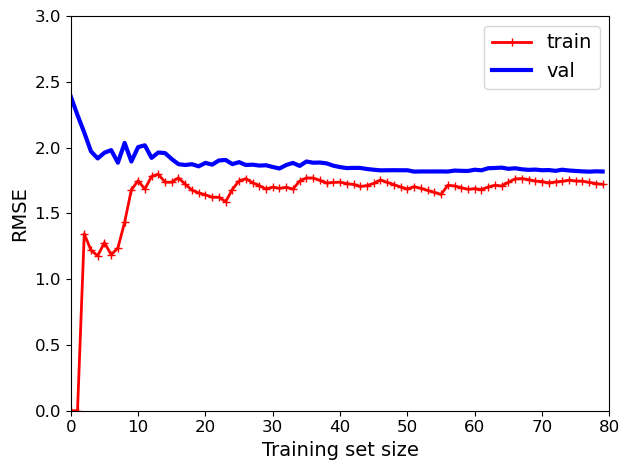

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

In [40]:
# validation error: 2 RMSE, it high, so we get underfitting on data.

Saving figure learning_curves_plot


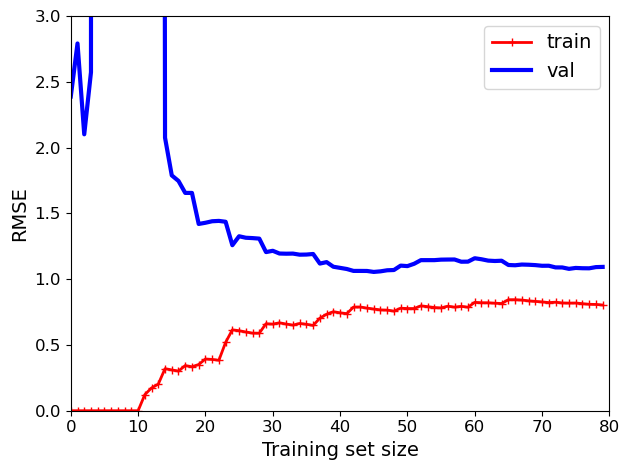

In [55]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# Regularized Linear Models

## Ridge Regression

In [38]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # solver="cholesky", => model used closed form not GD
#  alpha=1 => learning reqularization
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [40]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


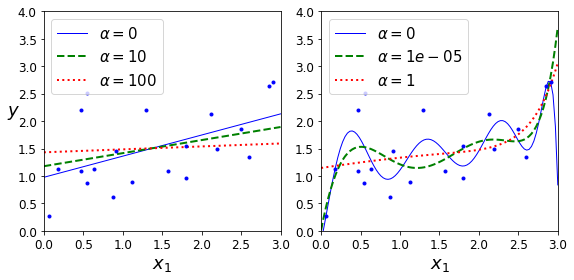

In [41]:
from sklearn.linear_model import Ridge # Ridge: is leanier regrission + ridge reqularization

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

**Note**: to be future-proof, we set `max_iter=1000` and `tol=1e-3` because these will be the default values in Scikit-Learn 0.21.

In [42]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
# penalty="l2" => L2 => Ridge.
sgd_reg.fit(X, y.ravel()) # ravel => smoth y
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso Regression

/Users/ageron/miniconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


Saving figure lasso_regression_plot


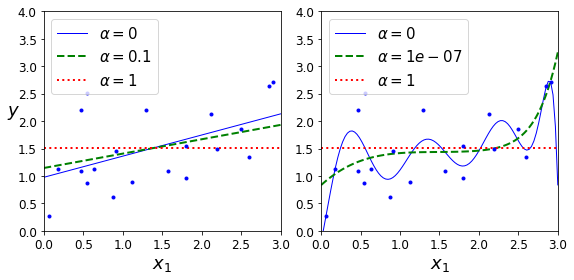

In [43]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [44]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
# l1_ratio=0.5 => or => lasso persentage and 1-Ridge
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [44]:
np.random.seed(42)
m = 100 # iteration loop
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1) # x**2 to generate curve.

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [50]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), # degree=90 => create large model to see overvalidation. to see overfit data
        ("std_scaler", StandardScaler()) # scaling data
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # fit_transform in train data => fit => calc mean and min standat diviation to each features,
# fit => (x featuer - mean ) / standat diviation => each featuers will become mean =0, SD =1.
# transform => apply x_train/6 (Ex) to scale data


X_val_poly_scaled = poly_scaler.transform(X_val) # in validation data stage will do transform, not fit.

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
# max_iter=1 => 1 iteration
# tol=-np.infty => tolerance not stop model training when desint less than specific value
# warm_start=True => continue trianing from prevuis train model. we are trained data earlyer
# penalty=None,=> will not use any regulization

minimum_val_error = float("inf") # minimum_val_error variable: infinity value
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [51]:
best_epoch

239

In [52]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

Create the graph:

Saving figure early_stopping_plot


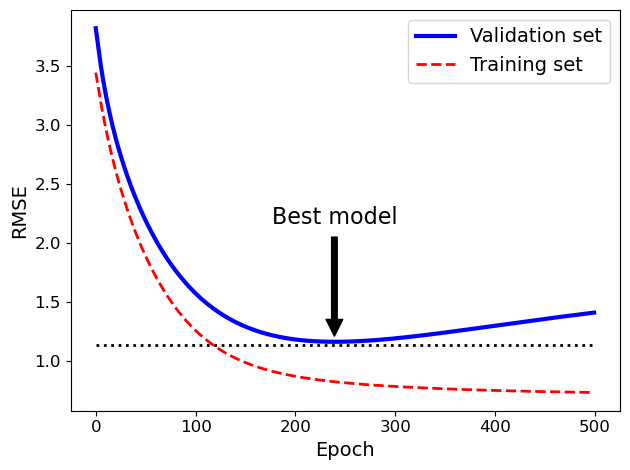

In [53]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [54]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [51]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

Saving figure lasso_vs_ridge_plot


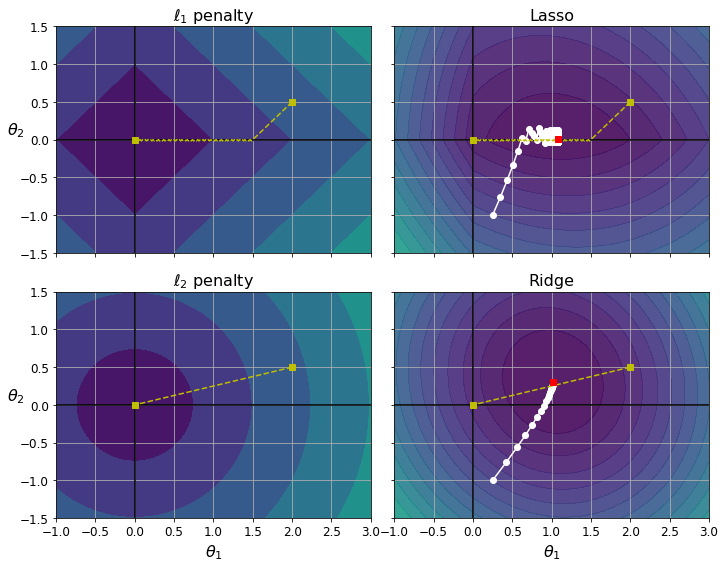

In [52]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

# Logistic Regression

## Decision Boundaries

Saving figure logistic_function_plot


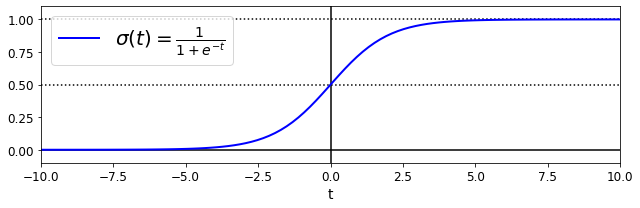

In [53]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [117]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [118]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [119]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

C:\Users\abdo\AppData\Local\Temp\ipykernel_8992\2130579894.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


**Note**: To be future-proof we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

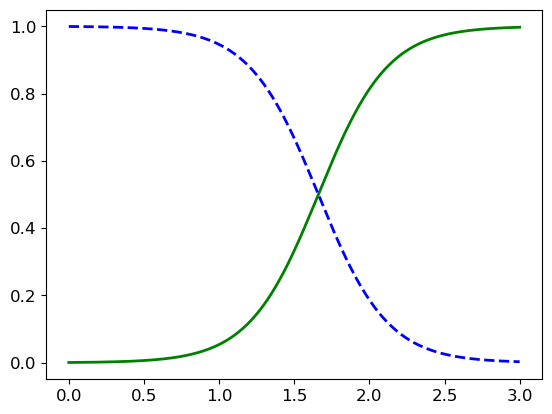

In [121]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

The figure in the book actually is actually a bit fancier:

C:\Users\abdo\.conda\envs\tf2\lib\site-packages\matplotlib\patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


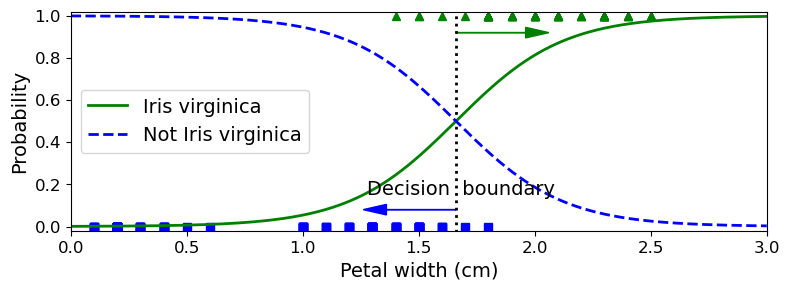

In [122]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [126]:
decision_boundary

array([1.66066066])

In [127]:
log_reg.predict([[1.7], [1.5]])

ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.

## Softmax Regression

C:\Users\abdo\AppData\Local\Temp\ipykernel_8992\3823961991.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


Saving figure logistic_regression_contour_plot


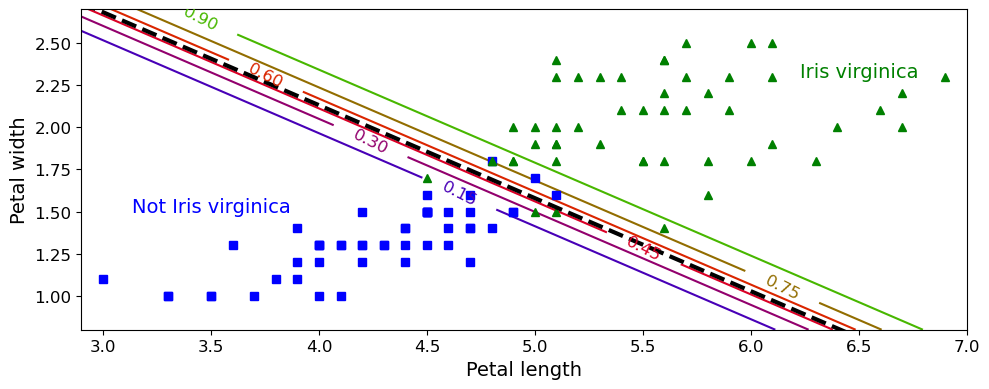

In [128]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [129]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
# multi_class="multinomial" => LogisticRegression will be softmax
# solver="lbfgs" => work as softmax multiclass
# C=10 => regulization term, max value then no regulization used.

softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Saving figure softmax_regression_contour_plot


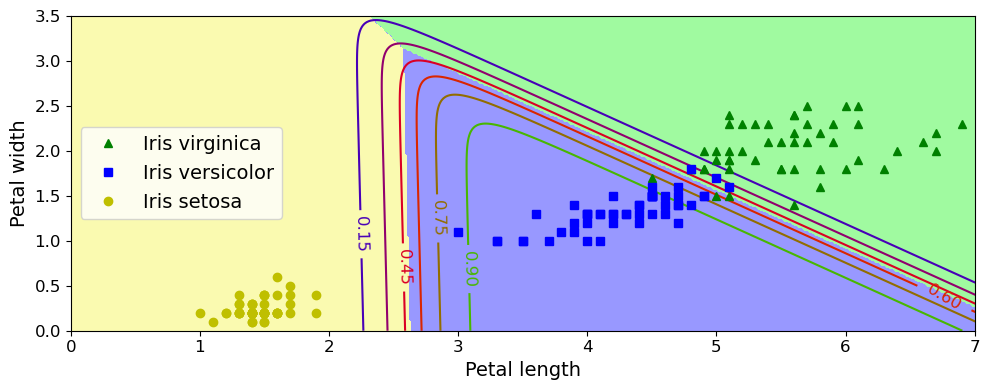

In [130]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [131]:
softmax_reg.predict([[5, 2]])

array([2])

In [132]:
softmax_reg.predict_proba([[5, 2]]) # predict_proba to see probapility

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercise solutions

## 1. to 11.

## 1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster-using Gradient Descent than using the Normal Equation or SVD decomposition.

## Here are some of GD:

### 1. Stochastic Gradient Descent (SGD):
SGD does not require storing or inverting large matrices, which is computationally expensive with millions of features.
It iteratively updates weights using small batches (or single examples), making it memory-efficient.
How: It updates the parameters𝜃 based on the gradient of the cost function for one training example (or a small batch):

### 2. Mini-Batch Gradient Descent:
Why:Similar to SGD but processes a small batch of examples at each iteration, offering a balance between computational efficiency and gradient noise reduction.
How: It computes gradients on mini-batches of the data, allowing more parallelization compared to pure SGD.
    

## Other technic:

### 1. Coordinate Descent:
It is efficient when the feature matrix is sparse (many features but most have zero values).
Instead of updating all parameters at once, it updates one parameter at a time while keeping others fixed.
How do it: Cycles through each parameter and optimizes it, leveraging sparsity for faster convergence.

### 2. Feature Selection + Dimensionality Reduction Techniques
When millions of features are present, many might be irrelevant or redundant. Reducing the feature space makes learning more efficient.
How to do: Use methods like Principal Component Analysis (PCA) to project features into a lower-dimensional space.
Apply techniques like L1 regularization (Lasso Regression) to automatically perform feature selection.

### 3. Online Learning Algorithms:
Ideal for streaming data or when it’s infeasible to load the entire dataset into memory.
Incrementally updates the model with each new data point.
How: Extends SGD by updating the model weights as new data arrives.




## 2.  Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

Algorithms that rely on distances to optimize their parameters, like Linear regression with gradient descent. Algorithms may suffer from different feature scales because the optimal optimization path is not straight. More precisely, feature scaling effects parameter scaling in the loss curve.

The simple solution is to normalize/standarize all features to be in ranges such as or using $[0,1]$ $[-1,1]$ mean/standard diviation to center feature distributions around $0$ with $theta=1$.


Note that the normal equation/SVD approach will work just fine without the need for feature scaling.

Added to the problem of regularizing a model with different feature scales is the possibility to convert the found configuration to a suboptimal solution.

## 3. Can gradient descent get stuck in a local minimum when training a logistic regression model?

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

Two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum.

If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high). So, it will not be stuck at the local minimum.

## 4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while.

## 5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this

When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. So, it means the model is overfitting.

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

## 6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error. So, stopping Mini-batch Gradient Descent immediately is a good idea and it is better to use Batch GD as it takes all the training set rather than a randomized training set.

## 7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. So, Stochastic and Mini-batch Gradient Descent will reach the vicinity of the optimal solution but the fastest is Stochastic GD.

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while. When the cost function (below image) is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.



## 8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

Three ways to solve: Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.



## 9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

Both curves have reached a plateau; they are close and fairly high. The model suffers from high bias.

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression.

Increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias. So, reducing hyperparameter α will reduce the bias.


## 10. Why would you want to use:

• Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?

• Lasso instead of Ridge Regression?

• Elastic Net instead of Lasso?

    - This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
    - An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).
    - Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.


## 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?).

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

The logistic — noted σ(・) — is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. Once the Logistic Regression model has estimated the probability p = hθ(x) that an instance x belongs to the positive class, it can make its prediction ŷ easily

Logistic Regression model prediction

y =

0 if p < 0 . 5

1 if p ≥ 0 . 5

SoftMax Regression: The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture. Let’s use Softmax Regression to classify the iris flowers into all three classes.

Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

So, since I want to classify pictures as outdoor/indoor and daytime/nighttime that means whether 1 or 0 classifier is enough that means I can use binary classifier aka Logistic Regression.

Ref. https://anjancse07.medium.com/solution-of-the-exercises-hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow-78457a7b08d3

## 12. Implement Batch Gradient Descent with Early Stopping for Softmax Regression (Without the use of Scikit-Learn)

Let's do it using the MNIST Dataset:

In [138]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [139]:
X, y = datasets.load_digits(return_X_y=True)

In [140]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
X_test, y_test = X_val, y_val

In [145]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

(-0.5, 7.5, 7.5, -0.5)

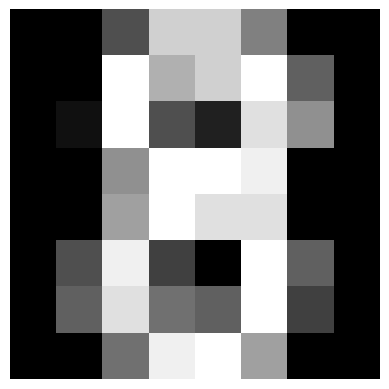

In [168]:
plt.imshow(X_train[0].reshape(8,8), cmap='gray')
plt.axis('off')

In [147]:
y_train[0]

8

## 1.Softmax Regression:

In [169]:
m, n = X_train.shape
K = len(set(y_train))
m, n, K

(1257, 64, 10)

In [170]:
X_train_ = np.concatenate((np.ones((m, 1)), X_train), axis=1)
X_train_.shape

(1257, 65)

In [171]:
X_val_ = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
X_val_.shape

(540, 65)

In [172]:
W = np.random.rand(n+1, K)

In [173]:
def softmax(u):
    """Calculate the softmax vector using the input matrix
    
    # Arguments
        u: np.ndarray, input matrix of samples
    
    # Returns
        v: np.nadarray, softmaxed output matrix
    """
    return np.exp(u)/np.sum(np.exp(u), axis=1)[:,None]

In [174]:
def linear(X, W):
    """A Simple Linear Transformation
    """
    return np.matmul(X, W)

In [175]:
softmax(linear(X_train_, W)).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

## 2. Batch Gradient Descent"

In [176]:
def cross_entropy(preds, targets):
    """Returns Cross Entropy Loss for Multi-class Classification"""
    
    m, K = preds.shape
    log_p = np.log(preds)
    y_logp = targets * log_p  # elementwise
    return (-1/m) * y_logp.sum(axis=1).sum()

In [177]:
def one_hot(u):
    m, K = u.shape[0], len(set(u))
    encoded = np.zeros((m, K))
    for i, u_i in enumerate(u):
        encoded[i][u_i] = 1
    return encoded

In [178]:
p_hat = softmax(linear(X_train_, W))
p_hat.shape, y_train.shape

((1257, 10), (1257,))

In [179]:
cross_entropy(p_hat, one_hot(y_train))

33.477514313286534

In [180]:
def grad_cross_entropy(inputs, preds, targets):
    """Calculate the gradient of the cross entropy loss function."""
    
    m, n = inputs.shape
    k = preds.shape[1]
    err = preds - targets
    return (1./m) * np.matmul(inputs.T, err)

In [181]:
X_train_.shape, p_hat.shape, one_hot(y_train).shape

((1257, 65), (1257, 10), (1257, 10))

In [182]:
grad_cross_entropy(X_train_, p_hat, one_hot(y_train)).shape

(65, 10)

## 3. Early Stopping

In [183]:
def early_stop(val_losses):
    """Returns True if current_val_loss > prev_val_loss"""
    
    if len(val_losses) > 1:
        if val_losses[-1] > val_losses[-2]:
            return True
    return False

## 4. Training Loop

In [184]:
epochs, lr = 10000, 0.02
train_losses, val_losses = list(), list()

In [185]:
W = np.random.rand(n+1, K)

In [191]:
index =1
for epoch in range(epochs):
    # forward pass
    y_preds = softmax(linear(X_train_, W))
    
    # calculate train loss
    train_loss = cross_entropy(y_preds, one_hot(y_train))
    train_losses.append(train_loss)
    
    # calculate validation loss
    val_loss = cross_entropy(softmax(linear(X_val_, W)), one_hot(y_val))
    val_losses.append(val_loss)
    
    # Optimize parameters
    W = W - (lr * grad_cross_entropy(X_train_, y_preds, one_hot(y_train)))
    
    index+=1
    # early stop
    if early_stop(val_losses):
        break

index

338

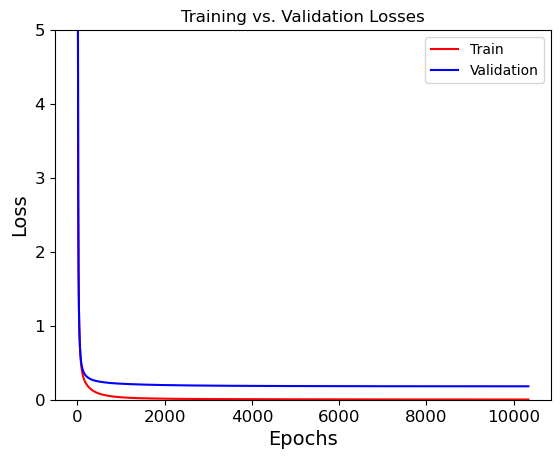

In [192]:
plt.plot(range(len(train_losses)), train_losses, color='red', label='Train')
plt.plot(range(len(val_losses)), val_losses, color='blue', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,5)
plt.legend()
plt.title('Training vs. Validation Losses')
plt.show()

In [196]:
train_losses[len(train_losses) -1], val_losses[len(val_losses) -1]

(0.002917773699601118, 0.1815608858137482)

In [197]:
train_losses[index -1], val_losses[index -1]

(0.13009329102961045, 0.2696773701098687)

In [188]:
# Let's check our accuracy over the validation set:
val_preds = np.argmax(softmax(linear(X_val_, W)), axis=1)

In [189]:
acc = ((val_preds == y_val).sum())/len(val_preds)
acc

0.9592592592592593

We got ~95% accuracy over unseen data.

Ref. https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/04.Training-Models.ipynb

See appendix A.

## 12. Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn)

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [67]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [68]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [69]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [70]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [71]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [72]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [73]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [74]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [75]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [76]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [77]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [78]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [79]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [80]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [81]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [82]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399382
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [83]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

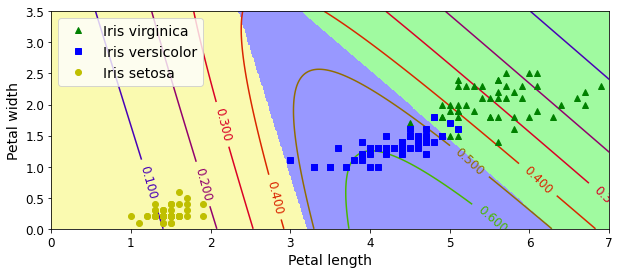

In [84]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [85]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.